In [1]:
#Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Exploring Dataset

In [2]:
df = pd.read_csv('data/theater_play.csv')
df.head()

,PLAY_DATE,PLAY_NAME,THEATER_NAME,PLAY_CATEGORY,IS_GUEST_PLAY,PLAY_TYPE,LONGITUDE,LATITUDE,NUMBER_OF_AUDIENCE
0,2017-12-27,KARAGÖZ' ÜN UYKUSU,Gaziosmanpaşa Ferih Egemen Çocuk Tiyatrosu Sah...,Çocuk,0,Yerli,28.916482,41.057846,50
1,2019-03-28,ŞAHANE ZÜĞÜRTLER,Kadıköy Haldun Taner Sahnesi,Yetişkin,0,Yabancı,29.023408,40.991770,1
2,2017-11-30,BAK BİZİM ŞARKIMIZI ÇALIYORLAR,Kağıthane Sadabad Sahnesi,Müzikal,0,Yabancı,28.970972,41.079366,84
3,2020-01-24,ÇIN SABAHTA,Gaziosmanpaşa Sahnesi,Yetişkin,0,Yerli,28.916482,41.057846,46
4,2019-01-27,POLLYANNA,Kağıthane Sadabad Sahnesi,Çocuk,0,Yabancı,28.970972,41.079366,150


In [3]:
df.shape

(27298, 9)

### Missing Values

In [4]:
#Check Missing Values - Teather name is missing in one record
df.isna().sum()

PLAY_DATE             0
PLAY_NAME             0
THEATER_NAME          1
PLAY_CATEGORY         0
IS_GUEST_PLAY         0
PLAY_TYPE             0
LONGITUDE             0
LATITUDE              0
NUMBER_OF_AUDIENCE    0
dtype: int64

In [5]:
#Drop the row with missing value
df.dropna(axis=0, inplace=True)
df.isna().sum()

PLAY_DATE             0
PLAY_NAME             0
THEATER_NAME          0
PLAY_CATEGORY         0
IS_GUEST_PLAY         0
PLAY_TYPE             0
LONGITUDE             0
LATITUDE              0
NUMBER_OF_AUDIENCE    0
dtype: int64

### Data Types

In [6]:
#Check datatypes
df.dtypes

PLAY_DATE              object
PLAY_NAME              object
THEATER_NAME           object
PLAY_CATEGORY          object
IS_GUEST_PLAY           int64
PLAY_TYPE              object
LONGITUDE             float64
LATITUDE              float64
NUMBER_OF_AUDIENCE      int64
dtype: object

In [7]:
# Convert PLAY_DATE to Datetime Series
df['PLAY_DATE'] = pd.to_datetime(df['PLAY_DATE'])

### Numeric Variables

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IS_GUEST_PLAY,27297.0,0.041580,0.199630,0.000000,0.000000,0.000000,0.000000,1.000000
LONGITUDE,27297.0,28.986390,0.060750,28.876578,28.956194,28.988829,29.023408,29.104798
LATITUDE,27297.0,41.040190,0.030050,40.991770,41.017064,41.025025,41.057846,41.097745
NUMBER_OF_AUDIENCE,27297.0,66.655896,167.924858,1.000000,11.000000,32.000000,67.000000,3588.000000


* Guest Play is a binary variable, showing whether a play is guest play or not. 
* Number of Audience has a mean of 66 and median of 32, with max value 3588. There seems to be outlier effect on this variable

C:\Users\TCLSOYKAN\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


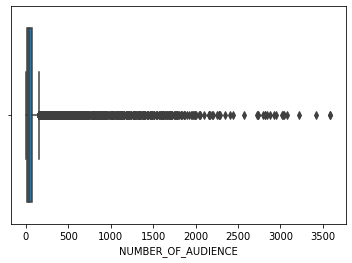

In [9]:
sns.boxplot(df['NUMBER_OF_AUDIENCE']);

### Detecting Outliers

In [10]:
# calculate interquartile range
q25, q75 = np.percentile(df['NUMBER_OF_AUDIENCE'], 25), np.percentile(df['NUMBER_OF_AUDIENCE'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=11.000, 75th=67.000, IQR=56.000


In [11]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in df['NUMBER_OF_AUDIENCE'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 1924


In [12]:
#Remove Outliers
df[(df['NUMBER_OF_AUDIENCE']>=lower)&(df['NUMBER_OF_AUDIENCE']<=upper)]
df.shape

(27297, 9)

In [13]:
df.shape

(27297, 9)

C:\Users\TCLSOYKAN\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


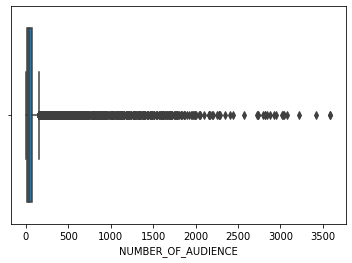

In [14]:
sns.boxplot(df['NUMBER_OF_AUDIENCE']);

In [15]:
df['NUMBER_OF_AUDIENCE'].describe()

count    27297.000000
mean        66.655896
std        167.924858
min          1.000000
25%         11.000000
50%         32.000000
75%         67.000000
max       3588.000000
Name: NUMBER_OF_AUDIENCE, dtype: float64

### Distribution of #Audience

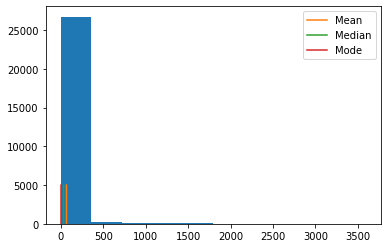

In [16]:
plt.hist(df['NUMBER_OF_AUDIENCE'])
plt.plot([df['NUMBER_OF_AUDIENCE'].mean() for _ in range(5000)], np.arange(5000), label='Mean')
plt.plot([df['NUMBER_OF_AUDIENCE'].median() for _ in range(5000)], np.arange(5000), label='Median')
plt.plot([df['NUMBER_OF_AUDIENCE'].mode() for _ in range(5000)], np.arange(5000), label='Mode')
plt.legend();

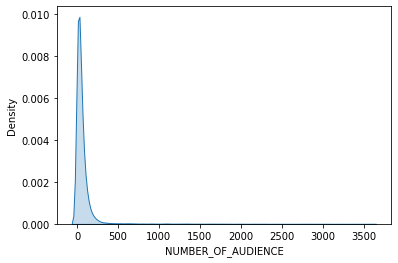

In [17]:
sns.kdeplot(df['NUMBER_OF_AUDIENCE'], fill=True);

This variable has a clear right tail distribution where most values are small but mean is affected by high values in tail

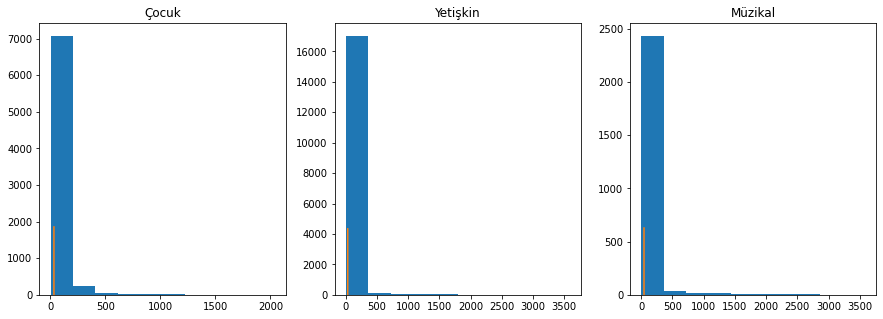

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
for i, cat in enumerate(df['PLAY_CATEGORY'].unique()):
    temp = df.loc[df['PLAY_CATEGORY']==cat,'NUMBER_OF_AUDIENCE']
    axes[i].hist(temp)
    axes[i].plot([temp.median() for _ in range(int(len(temp)/4))], np.arange(int(len(temp)/4)))
    axes[i].set_title(cat)

* Total number of musicals are small compared to other categories
* Median number of audience attending musicals is higher than other categories

## Log Transformation

* Log Transformation can be applied to this feature to reduce the effect of skewness(right tail) and get a distribution closer to normal

In [19]:
df['NUM_AUDIENCE_LOG'] = np.log(df['NUMBER_OF_AUDIENCE'].values)

<AxesSubplot:xlabel='NUM_AUDIENCE_LOG', ylabel='Density'>

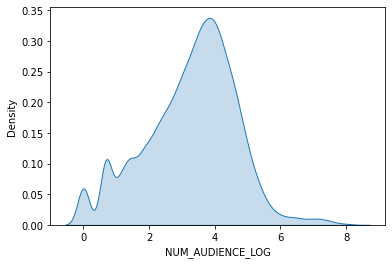

In [20]:
sns.kdeplot(df['NUM_AUDIENCE_LOG'], fill=True)

## Play Date - Datetime

In [21]:
# We can extract year, month and day info as new features
df['PLAY_YEAR'] = df['PLAY_DATE'].dt.year
df['PLAY_MONTH'] = df['PLAY_DATE'].dt.month

In [22]:
t = pd.CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
df['PLAY_DAY'] = df['PLAY_DATE'].dt.strftime("%A")
df['PLAY_DAY'] = df['PLAY_DAY'].astype(t)

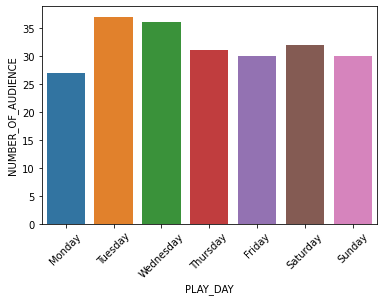

In [23]:
data = df.groupby('PLAY_DAY')['NUMBER_OF_AUDIENCE'].median()
sns.barplot(x=data.index, y=data)
plt.xticks(rotation=45)
plt.show()

Average audience is higher in mid_week (Tuesday to Thursday) 

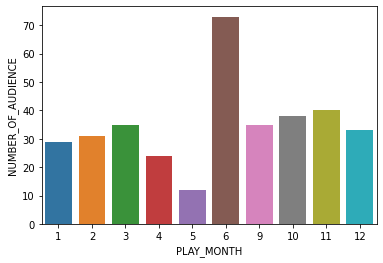

In [24]:
data = df.groupby('PLAY_MONTH')['NUMBER_OF_AUDIENCE'].median()
sns.barplot(x=data.index, y=data);

On monthly averages, June seems to be higher

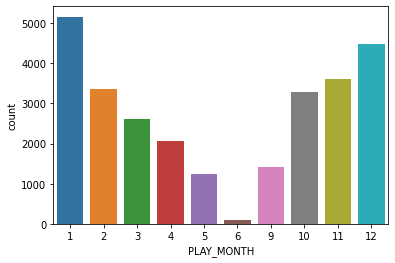

In [25]:
sns.countplot(x='PLAY_MONTH', data=df);

We can see that June is the end of season. There are a limited number of plays in June. Then the new season begins with September. 

## Categorical Variables

In [26]:
df.describe(include=object).T

,count,unique,top,freq
PLAY_NAME,27297,350,KARINCALAR - BİR SAVAŞ VARDI,1025
THEATER_NAME,27297,77,Kağıthane Sadabad Sahnesi,3553
PLAY_CATEGORY,27297,3,Yetişkin,17348
PLAY_TYPE,27297,2,Yerli,15720


In [27]:
#There are lots of small theathers. 
df['THEATER_NAME'].value_counts()

Kağıthane Sadabad Sahnesi                3553
Fatih Reşat Nuri Sahnesi                 3364
Gaziosmanpaşa Sahnesi                    3347
Ümraniye Sahnesi                         3260
Harbiye Muhsin Ertuğrul Sahnesi          3200
                                         ... 
 REHA ÖZCAN KUMPANYASI                      2
 TİYATRO 11                                 2
 BOĞAZİÇİ GÖSTERİ SANATLARI TOPLULUĞU       2
ONLINE                                      1
 BU YAPIM                                   1
Name: THEATER_NAME, Length: 77, dtype: int64

In [28]:
#Take the first name of the teather
df['THEATER_NAME'] = df['THEATER_NAME'].str.split().apply(lambda x : x[0])

In [29]:
popular_theathers = df['THEATER_NAME'].value_counts()[df['THEATER_NAME'].value_counts()>100]
popular_theathers

Üsküdar          4497
Kağıthane        4038
Gaziosmanpaşa    3927
Harbiye          3382
Fatih            3364
Ümraniye         3260
Kadıköy          2528
Sultangazi       1690
Name: THEATER_NAME, dtype: int64

In [30]:
df = df[df['THEATER_NAME'].apply(lambda x: x in popular_theathers)]

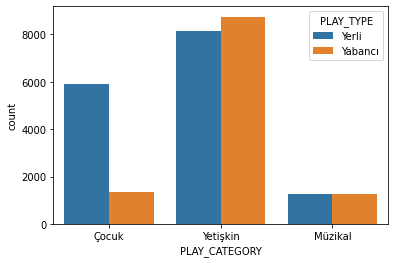

In [31]:
sns.countplot(x='PLAY_CATEGORY', hue='PLAY_TYPE', data=df);

Most plays are for adults. Most kids plays are local(domestic) plays, for other categories (adult, musical) foreign-domestic plays are balanced

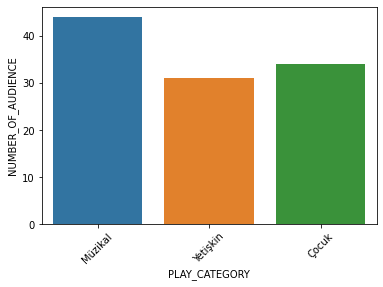

In [32]:
data = df.groupby('PLAY_CATEGORY')['NUMBER_OF_AUDIENCE'].median()
sns.barplot(x=data.index, y=data)
plt.xticks(rotation=45)
plt.show()

Musicals have more attendance than other play categories

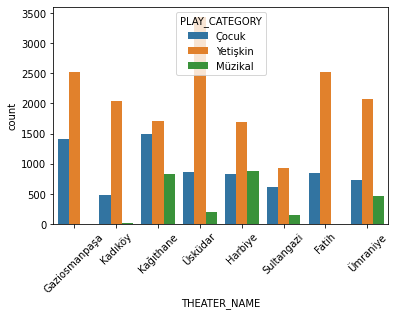

In [33]:
sns.countplot(x='THEATER_NAME', hue='PLAY_CATEGORY', data=df)
plt.xticks(rotation=45);

Üsküdar-Fatih-Gaziosmanpasa theaters have more plays, while musical plays are mostly on Harbiye and Kagıthane

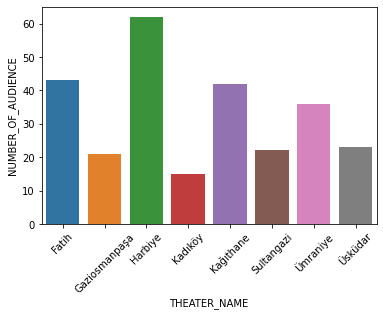

In [34]:
data = df.groupby('THEATER_NAME')['NUMBER_OF_AUDIENCE'].median()
sns.barplot(x=data.index, y=data)
plt.xticks(rotation=45)
plt.show()

Average number of audience in Harbiye, Ümraniye, Fatih, Kağıthane are higher.1 

## Classification

** Let's try to predict the play type using other variables. 

In [35]:
df.head()

,PLAY_DATE,PLAY_NAME,THEATER_NAME,PLAY_CATEGORY,IS_GUEST_PLAY,PLAY_TYPE,LONGITUDE,LATITUDE,NUMBER_OF_AUDIENCE,NUM_AUDIENCE_LOG,PLAY_YEAR,PLAY_MONTH,PLAY_DAY
0,2017-12-27,KARAGÖZ' ÜN UYKUSU,Gaziosmanpaşa,Çocuk,0,Yerli,28.916482,41.057846,50,3.912023,2017,12,Wednesday
1,2019-03-28,ŞAHANE ZÜĞÜRTLER,Kadıköy,Yetişkin,0,Yabancı,29.023408,40.991770,1,0.000000,2019,3,Thursday
2,2017-11-30,BAK BİZİM ŞARKIMIZI ÇALIYORLAR,Kağıthane,Müzikal,0,Yabancı,28.970972,41.079366,84,4.430817,2017,11,Thursday
3,2020-01-24,ÇIN SABAHTA,Gaziosmanpaşa,Yetişkin,0,Yerli,28.916482,41.057846,46,3.828641,2020,1,Friday
4,2019-01-27,POLLYANNA,Kağıthane,Çocuk,0,Yabancı,28.970972,41.079366,150,5.010635,2019,1,Sunday




### Label Encoding for Binary Variable

In [36]:
df['PLAY_TYPE'] = df['PLAY_TYPE'].factorize()[0]

In [37]:
df.head()

,PLAY_DATE,PLAY_NAME,THEATER_NAME,PLAY_CATEGORY,IS_GUEST_PLAY,PLAY_TYPE,LONGITUDE,LATITUDE,NUMBER_OF_AUDIENCE,NUM_AUDIENCE_LOG,PLAY_YEAR,PLAY_MONTH,PLAY_DAY
0,2017-12-27,KARAGÖZ' ÜN UYKUSU,Gaziosmanpaşa,Çocuk,0,0,28.916482,41.057846,50,3.912023,2017,12,Wednesday
1,2019-03-28,ŞAHANE ZÜĞÜRTLER,Kadıköy,Yetişkin,0,1,29.023408,40.991770,1,0.000000,2019,3,Thursday
2,2017-11-30,BAK BİZİM ŞARKIMIZI ÇALIYORLAR,Kağıthane,Müzikal,0,1,28.970972,41.079366,84,4.430817,2017,11,Thursday
3,2020-01-24,ÇIN SABAHTA,Gaziosmanpaşa,Yetişkin,0,0,28.916482,41.057846,46,3.828641,2020,1,Friday
4,2019-01-27,POLLYANNA,Kağıthane,Çocuk,0,1,28.970972,41.079366,150,5.010635,2019,1,Sunday


### One Hot Encoding

In [38]:
for col in ['THEATER_NAME','PLAY_YEAR', 'PLAY_YEAR', 'PLAY_DAY', 'PLAY_MONTH']:
    temp = pd.get_dummies(df[col], drop_first=True, prefix=col)
    df = pd.concat([df, temp], axis=1)
df.head()

,PLAY_DATE,PLAY_NAME,THEATER_NAME,PLAY_CATEGORY,IS_GUEST_PLAY,PLAY_TYPE,LONGITUDE,LATITUDE,NUMBER_OF_AUDIENCE,NUM_AUDIENCE_LOG,...,PLAY_DAY_Sunday,PLAY_MONTH_2,PLAY_MONTH_3,PLAY_MONTH_4,PLAY_MONTH_5,PLAY_MONTH_6,PLAY_MONTH_9,PLAY_MONTH_10,PLAY_MONTH_11,PLAY_MONTH_12
0,2017-12-27,KARAGÖZ' ÜN UYKUSU,Gaziosmanpaşa,Çocuk,0,0,28.916482,41.057846,50,3.912023,...,0,0,0,0,0,0,0,0,0,1
1,2019-03-28,ŞAHANE ZÜĞÜRTLER,Kadıköy,Yetişkin,0,1,29.023408,40.991770,1,0.000000,...,0,0,1,0,0,0,0,0,0,0
2,2017-11-30,BAK BİZİM ŞARKIMIZI ÇALIYORLAR,Kağıthane,Müzikal,0,1,28.970972,41.079366,84,4.430817,...,0,0,0,0,0,0,0,0,1,0
3,2020-01-24,ÇIN SABAHTA,Gaziosmanpaşa,Yetişkin,0,0,28.916482,41.057846,46,3.828641,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-27,POLLYANNA,Kağıthane,Çocuk,0,1,28.970972,41.079366,150,5.010635,...,1,0,0,0,0,0,0,0,0,0


In [39]:
#Drop Longitude, Latitude Cols as we already have theater name indicating location. Also drop the date column
X = df.drop(['PLAY_DATE', 'LONGITUDE', 'LATITUDE', 'NUMBER_OF_AUDIENCE', 'PLAY_CATEGORY', 'THEATER_NAME','PLAY_YEAR', 'PLAY_YEAR', 'PLAY_DAY', 'PLAY_MONTH', 'PLAY_NAME'], axis=1)
y = df['PLAY_CATEGORY']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18680, 33), (8006, 33), (18680,), (8006,))

### Scaling of Numberic Variable

In [41]:
scaler = StandardScaler()
X_train['NUM_AUDIENCE_LOG'] = scaler.fit_transform(X_train[['NUM_AUDIENCE_LOG']])
X_test['NUM_AUDIENCE_LOG'] = scaler.transform(X_test[['NUM_AUDIENCE_LOG']])

C:\Users\TCLSOY~1\AppData\Local\Temp/ipykernel_12224/4128868877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['NUM_AUDIENCE_LOG'] = scaler.fit_transform(X_train[['NUM_AUDIENCE_LOG']])
C:\Users\TCLSOY~1\AppData\Local\Temp/ipykernel_12224/4128868877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['NUM_AUDIENCE_LOG'] = scaler.transform(X_test[['NUM_AUDIENCE_LOG']])


In [44]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Müzikal       0.41      0.36      0.38       758
    Yetişkin       0.75      0.79      0.77      5072
       Çocuk       0.52      0.49      0.50      2176

    accuracy                           0.67      8006
   macro avg       0.56      0.55      0.55      8006
weighted avg       0.66      0.67      0.66      8006



In [46]:
df['PLAY_CATEGORY'].value_counts(normalize=True)

Yetişkin    0.633478
Çocuk       0.271790
Müzikal     0.094731
Name: PLAY_CATEGORY, dtype: float64

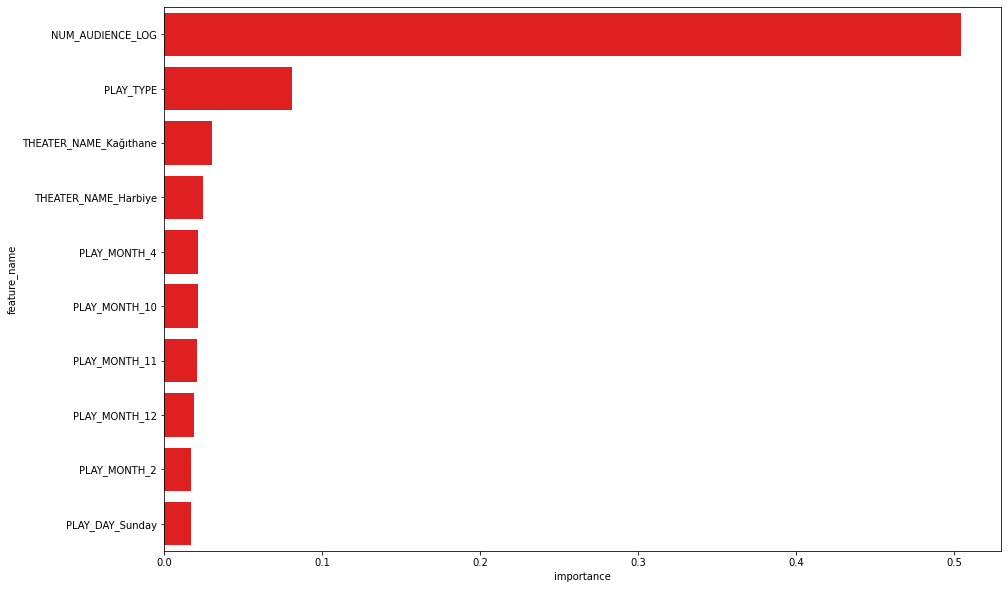

In [47]:
fig, ax = plt.subplots(figsize=(15,10))
feature_df = pd.DataFrame({'feature_name': X_train.columns, 'importance': rfc.feature_importances_}).sort_values(by='importance', ascending=False).iloc[:10,:]
sns.barplot(x='importance', y='feature_name', data=feature_df, color='r', ax=ax);

We can see that play type and number of audience are the main features affecting our prediction